# SYDE 552 Assignment 3: Hippocampal Models
### Due Friday, March 15, Anywhere on Earth 
### Value: 15% of total marks for the course

The purpose of this assigment is to give you experience working with associative memories. To do so, we'll be using pytorch to implement different associative memory models.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. The Hippocampus

**1.a) [2 marks]** The hippocampus is implicated in spatial navigation and episodic memory.  How do we know this?  What are some of the neuroscience results that revealed these facilities of the hippocampus?  (see Kandel *et al.* Ch. 65)

***Role in spatial navigation***

The numerous connections between the hippocampus and other areas of the brain cause neural connections to strengthen over time. Processes involved in synaptic plasticity and long-term potentiation of the hippocampus allow mammals to orient themselves and navigate within an environment [1].

The hippocampus has been implicated in spatial navigation by several experiments that studied the ability of healthy and lesioned rats to navigate the Morris water maze. The lesioned rats demonstrated significant deficits in their spatial navigation abilities [2].

Additionally, other experiments have demonstrated the existence of "place" and "grid" cells in the hippocampus, which have an important role in spatial navigation and orientation. Grid cells arranged in hexagonal patterns of varying spatial resolution allow an organism to know where it is in space [2]. Place cells store information about specific locations or landmarks that allow an organism to navigate a familiar environment.

***Role in episodic memory***

We know the hippocampus is implicated in episodic memory from the case study of HM, a patient who suffered severed damage to the hippocampus [3]. He was able to learn new motor tasks over several days (tracing between the outlines of a star) but was incapable of storing new information—conversations with people, or anything that happened after his accident. In other words, HM's ability to form _episodic memories_ was severely impaired following his accident, but his _implicit memory_ was unaffected. From these observations of HM, we can conclude that the hippocampus is deeply implicated in the formation/consolidation of episodic memories.

**References**

[1] E. R. Kandel, J. H. Schwartz, T. M. Jessell, S. A. Siegelbaum, and A. J. Hudspeth, "Prefrontal Cortex, Hippocampus, and the Biology of Explicit Memory Storage," in _Principles of Neural Science, 5th Ed._ New York: McGraw Hill, 2013, ch. 67, pp. 1487-1521.

[2] T. Stewart and M. Furlong. SYDE 552. Class Lecture, Computational Neuroscience: "Lecture 13: Hippocampus 3 – Spatio-temporal Modelling." Systems Design Engineering, University of Waterloo, Waterloo, Canada, [DATE], 2024.

[3] T. Stewart and M. Furlong. SYDE 552. Class Lecture, Computational Neuroscience: "Lecture 11: Hippocampus 1 – Anatomy and Role in Cognition." Systems Design Engineering, University of Waterloo, Waterloo, Canada, [DATE], 2024.

**1.b) [2 marks]** The Gluck and Meyers model of hippocampus is a simple, effective model of hippocampus, and how representations may be constructed for the slow transfer to the neocortex.  However, it still has its limitations.  Explain some (two or more) of the limitations of the Gluck and Meyers model.  (The Gluck and Meyers Ch.6 reading will be useful in answering this question.) 

***Gluck and Meyers Model***

The model cortico-hippocampal model proposed by Gluck and Meyers uses a predictive autoencoder to approximate the hippocampal-region (HR) network. Inforamtion is then passed from the HR network to a separate cortico-cerebellar network for long term memory storage. Empirical results show that the autoencoder architecture of the model is strikingly consistent with the neurophysiological processes that take place during learning tasks [4].

The model is based on the finding that the hippocampus is necessary in types of learning that require modifying _representations_, but not their _associations_—in other words, subjects with hippocampal damage can still learn to map a conditioned stimulus (tone) onto a corresponding behavioural response [4]. Experiments have shown that this model accurately predicts the real behaviours seen in humans, rabbits, and rats when exposed to various conditioning experiments, including CS/UR pairing and discrimination reversal when the predictive/non-predictive stimuli are swapped [4].

***Limitations***

Though this model captures much of the behaviour that is observed in biological subjects, it does not capture all possible results seen in conditioning experiments. Extinction, for example, happens when the conditioned stimulus is presented alone, after the subject has learned an association. In this case, the conditioned response weakens, but the model does not contain a way to do this (even though the observed behaviour may be 'correct', the mechanism underlying it is an oversimplification). The extinction also occurs much more quickly in the model than it does in experimental trials.

Another one of the limitations of this model is that it has not been shown to generalize to other tasks that involve the hippocampus in a biological network [4]. The model cannot perfrom the delayed non-match to sample or declarative memory tasks, for example. The authors note that this is a limitation of the current implementation, however, and not necessarily the underlying structure of the model.

Finally, one other significant limitation of the cortico-hippocampal model is that it does not account for timing effects. In biological subjects with an intact hippocampus can be conditioned when a short delay is introduced between the conditioned stimulus and unconditioned response (known as _trace conditioning_). However, in lesioned subjects, this function is disrupted. Timing is therefore significant in understanding the role of the hippocampus in conditioning, which is unaccounted for in this model [4].

**References**

[4] M. A. Gluck and C. E. Meyers, "Cortico-Hippocampal Interaction in Associative Learning," in _Gateway to Memory._ Cambridge, MA: MIT Press, 2000, ch. 6, pp. 145-187.

**1.c) [2 marks]** Unsupervised pre-training is integral to the Gluck and Meyers model of Hippocampus, and unsupervised pre-training has been shown to accelerate reinforcement learning in rats navigating mazes.  However, unsupervised pre-training is not common in deep learning techniques.  Describe why that may be.  (See [15.1 of Goodfellow *et al.*](https://www.deeplearningbook.org/contents/representation.html))

Greedy layer-wise unsupervised pretraining involves individually optimizing each layer before moving to the next, such that all previous layers are fixed while training the next.

According to Goodfellow et al., the popularity of this algorithm has declined as more modern techniques have started to outperform it [5]. Another contributing factor in its lack of popularity could have to do with efficiency. Greedy algorithms tend to be computationally intensive (each layer is trained individually) and for this reason do not scale well for deep learning applications. Additionally, while this approach ensures optimal solutions for the individual components of the network, it does not guarantee a globally optimal solution [5].

One other possible (and more biologically-motivated) reason would be that this is not how neural networks in the brain are trained. From what we know about the brain, there is no way to isolate layers during training or learning processes. In this sense, if we want to mimic the processes that take place in the brain, it would make sense to start with something that is more similar to the way we understand it to work.

[5] I. Goodfellow, Y. Bengio, and A. Courville, "Representation Learning," in _Deep Learning._ Cambridge, MA: MIT Press, 2016, ch. 15, pp. 524-554.

# 2. Hopfield Networks

## Preliminaries

Although you should have installed them for prior assignments, we will require the pytorch and keras. Let's install those now.

```pip install torch keras```

Next, we will download the MNIST dataset.  We will do this through the Keras library instead of torchvision. 

In [71]:
import keras.datasets.mnist
import torch
import numpy as np
import matplotlib.pyplot as plt

In [72]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

As before, we will examine some of the images to make sure we got them right.

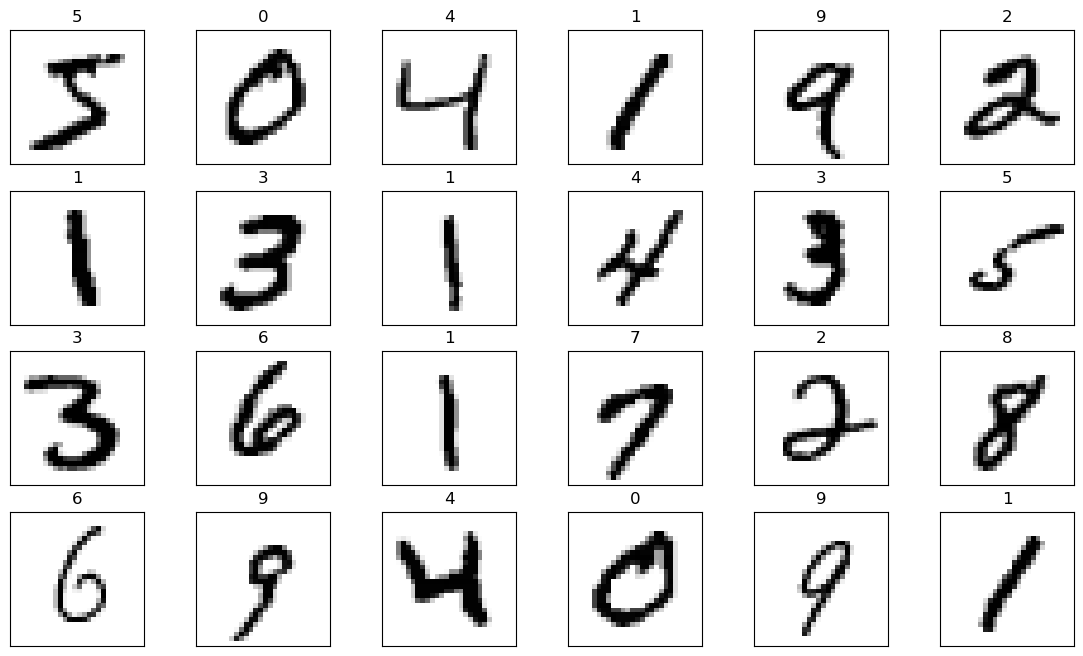

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(x_train[i].reshape((28,28)), vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(y_train[i]))

Normally, the MNIST dataset has images represented by values in the range $[0,255]$. However, since we are dealing with Hopfield networks, we are going to binarize the data.

In [74]:
def binarize(xs):
    '''
    xs : a num_samples by num_features array of images.
    '''
    binary = (xs / 255) > 0.5
    integer = 2 * binary - 1
    return integer

binary_imgs = binarize(x_train)

Further, to make things easy on our network, we are only going to look at images of the digits 0, 1, and 2

In [75]:
binary_imgs = binary_imgs[y_train < 3,:]
binary_labels = y_train[y_train < 3]

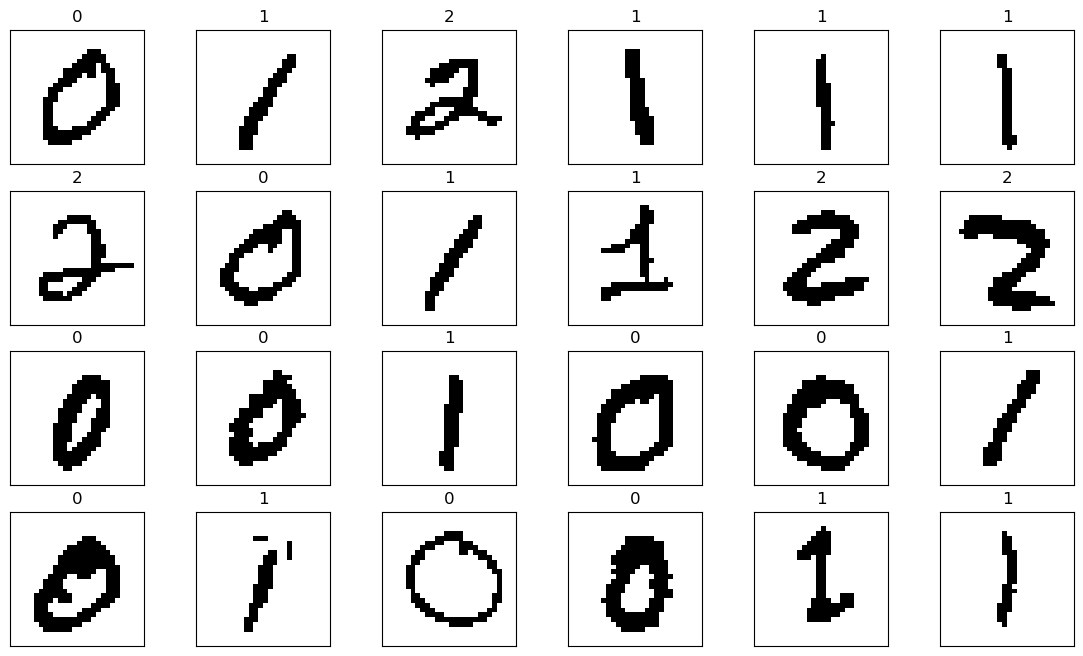

In [76]:
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(binary_imgs[i].reshape((28,28)), vmin=-1, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(binary_labels[i]))

We will also need to reshape the data into a vector representation, and then covert it to a pytorch tensor

In [77]:
binary_img_vecs = binary_imgs.reshape((-1,28*28))
binary_img_tensor = torch.from_numpy(binary_img_vecs).to(torch.float32)

In [78]:
print(f"Binary image tensor: {binary_img_tensor.shape}")

Binary image tensor: torch.Size([18623, 784])



**2.a) [2 Marks]**  Implement the Hopfield Network using Hopfield's learning rule.

We will first implement the Hopfield network using the outer product formulation for the weight matrix.  Given a set of patterns $\mathbf{x}_{i}$, by first computing the matrix

$D = \frac{1}{N}\sum_{i}^{N} (\mathbf{x}_{i}-\theta)(\mathbf{x}_{i}-\theta)^T$.

where $\theta = \frac{1}{ND}\sum_{i}^{N}\sum_{j}^{D} x_{i,j}$, i.e., the average value of all elements in the training data.

Next we remove the diagonal element of the matrix, making the weight matrix:

$$
W = D - \mathrm{diag}(D),
$$

where $\mathrm{diag}(D)$ is the diagonal of the $D$ matrix.  Note that when implementing this in numpy or pytorch we must apply the ```diag``` function twice, i.e.:

```
W = D - torch.diag(torch.diag(D))

```

Here is some code to implement the learning rule:

In [79]:
def outer_product_hopfield_matrix(training_patterns):
    '''
    train_hopfield_matrix - produces a matrix for a (non-Modern) Hopfield network using the outer product rule.
    
    Parameters:
    -----------
    training_patterns : torch.Tensor
        A Tensor of shape (num_patterns, num_features) that will be used to construct the weight matrix.
    
    Returns:
    --------
    W : torch.Tensor
        A (num_features, num_features) Tensor that stores the papers encoded in the network.
    '''
    
    theta = torch.sum(training_patterns) / (training_patterns.shape[0] * training_patterns.shape[1])
    D = torch.einsum('nd,ne->de', training_patterns - theta, training_patterns - theta) / float(training_patterns.shape[0])
    W = (D - torch.diag(torch.diag(D))) 
    return W
    
def evaluate_hopfield_network(W, input_pattern, training_patterns=None, num_iters=5, threshold=0):
    '''
    Evaluates a Hopfield network with weight matrix W on a number of test patterns. Also computes the similarity. 
    '''
    assert input_pattern.shape[1] == 1, f'''This function assumes you are cleaning up one pattern at a time. 
                                            Expected the input to be shape (1,{input_pattern.shape[1]}), 
                                            got {input_pattern.shape}'''
    s = input_pattern
    
    similarities = None
    if training_patterns is not None:
        similarities = torch.zeros((num_iters, training_patterns.shape[0]))
    ### end if
    
    for i in range(num_iters):
        s = torch.sign(W @ s - threshold)
        
        if training_patterns is not None:
            similarities[i,:] = torch.einsum('d,nd->n',s,training_patterns)
        ### end if
    ### end for
    return s, similarities

We want you to do the following things:

1. Compute the capacity of the network, using the expression $C \approx \frac{d}{2\log_{2}(d)}$, where $d$ is the number of neurons.
2. For a training set of 10 patterns, plot the original image and the reconstructed image side-by-side.
3. Plot the training and test error (Mean squared error between the predicted and true values) of the Hopfield network as a function of the number of patterns stored in the network up to capacity, $C$, for five randomly selected training sets selected from ```binary_img_tensor```.
4. For a training set of size 10 patterns, add salt and pepper noise (bit flips) to the **testing** images and compute the training error as the probability of noise increases. Note: Compare the reconstructed images to the non-noisy images, e.g., for any test image you would do something like:

```python
noisy_image = corrupt(test_image, noise_level)
reconstructed_images = evaluate_hopfield_network(W, noisy_image.T)
error = mse(reconstructed_images, test_images)
```

In [80]:
## 2.a.1 - Compute network capacity.
d = 784 # d is the number of neurons in the network, 28x28 = 784
C = int(d / (2 * np.log2(d)))
print(f"Network capacity: {C}")

Network capacity: 40


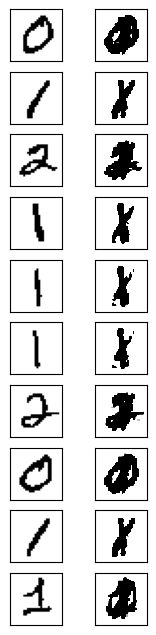

In [81]:
# 2.a.2 - plot original and reconstructed imatges.

# create weight matrix, W
W = outer_product_hopfield_matrix(binary_img_tensor[:10,:])

plt.figure(figsize=(2,8))

for i in range(10):
    # reconstruct training image, i:
    reconstructed_img = W @ binary_img_tensor[i,:].reshape((1,-1)).T

    # plot original image
    plt.subplot(10,2,1+2*i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(binary_imgs[i].reshape((28,28)), vmin=-1, vmax=1, cmap='gray_r')

    # plot reconstructed image
    plt.subplot(10,2,1+2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_img.reshape((28,28)), vmin=-1, vmax=1, cmap='gray_r')

In [82]:
def mse(true_vals, pred_val):
    return torch.mean((true_vals - pred_val)**2)

def generate_permutation(imgs, num_patterns):
    perm = np.random.choice(imgs.shape[0], num_patterns, replace=False)
    return imgs[perm,:]

def test_network(training_patterns, test_patterns, C, method='outer_product'):
    num_trials = 5
    assert training_patterns.shape[0] == C, f'''Error: Expected training patterns to contain {C} patterns'''
    training_error = torch.zeros(len(range(2, C)))
    test_error = torch.zeros(len(range(2, C)))

    # repeat for 5 trials
    for i in range(num_trials):
        print(f"Trial {i+1}")

        # vary num_patterns up to C
        for pattern_idx, num_patterns in enumerate(range(2,C)):
            
            # permute training patterns
            permuted = generate_permutation(training_patterns, num_patterns)

            # create weight matrix, W
            if method == 'outer_product':
                W = outer_product_hopfield_matrix(permuted[:num_patterns,:])
            elif method == 'pseudo_inv':
                W = pseudoinverse_hopfield_matrix(permuted[:num_patterns,:])
            else:
                raise ValueError(f"Invalid method: {method}")
            
            # for each image in the training and testing sets, compute the mse:
            # s_train, similarities = evaluate_hopfield_network(W, permuted[pattern_idx,:].reshape(1, -1).T)
            reconstructed_train = W @ permuted[pattern_idx,:].reshape(-1,1)
            training_error[pattern_idx] += mse(permuted[pattern_idx,:], reconstructed_train)
            print(f"Train error with {num_patterns} patterns: {training_error[pattern_idx]}")

            # s_test, similarities = evaluate_hopfield_network(W, test_patterns[pattern_idx,:].reshape(1, -1).T)
            reconstructed_test = W @ test_patterns[pattern_idx,:].reshape(-1,1)
            test_error[pattern_idx] += mse(test_patterns[i,:], reconstructed_test)
            print(f"Test error with {num_patterns} patterns: {test_error[pattern_idx]}")

        training_error[pattern_idx] /= num_patterns
        test_error[pattern_idx] /= num_patterns
    
    training_error /= num_trials
    test_error /= num_trials

    return training_error, test_error

In [83]:
train_imgs = binary_img_tensor[:40,:]
test_imgs = binary_img_tensor[40:80,:]
train_avg, test_avg = test_network(train_imgs, test_imgs, C)

Trial 1
Train error with 2 patterns: 14723.7470703125
Test error with 2 patterns: 18266.03515625
Train error with 3 patterns: 16548.62109375
Test error with 3 patterns: 1768.3544921875
Train error with 4 patterns: 2806.45556640625
Test error with 4 patterns: 809.6845092773438
Train error with 5 patterns: 4617.66162109375
Test error with 5 patterns: 12326.06640625
Train error with 6 patterns: 5232.9541015625
Test error with 6 patterns: 1662.32470703125
Train error with 7 patterns: 8133.642578125
Test error with 7 patterns: 2322.42724609375
Train error with 8 patterns: 4744.0458984375
Test error with 8 patterns: 2368.52490234375
Train error with 9 patterns: 1447.4847412109375
Test error with 9 patterns: 508.4510192871094
Train error with 10 patterns: 4351.00390625
Test error with 10 patterns: 2003.624755859375
Train error with 11 patterns: 10533.0400390625
Test error with 11 patterns: 363.53961181640625
Train error with 12 patterns: 2063.65869140625
Test error with 12 patterns: 893.31146

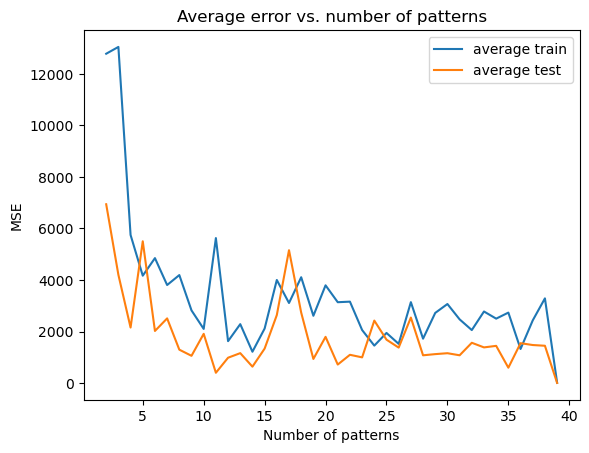

In [84]:
# 2.a.3 - Plot training and testing error.
plt.figure()
plt.plot(range(2,C), train_avg, label='average train')
plt.plot(range(2,C), test_avg, label='average test')
plt.xlabel('Number of patterns')
plt.ylabel('MSE')
plt.title('Average error vs. number of patterns')
plt.legend()
plt.show()

In [95]:
def salt_and_pepper(data, prob):
    '''
    This method guarantees the same number of pixels are flipped in each image
    '''
    for img in range(data.shape[0]):
        # get number of pixels to flip for image size and selected probability:
        n_pixels = int(data.shape[1] * prob)

        # select a random sample of n_pixels:
        permuted = np.random.permutation(np.arange(0, data.shape[1], 1))
        pixels = permuted[:n_pixels]
        
        # flip the selected pixels:
        for p in pixels:
            data[img, p] = -data[img, p] + 1
    '''
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            flip = torch.rand(1)
            if flip < prob:
                data[i,j] = -data[i,j] + 1
                '''
    return data

In [96]:
# 2.a.4 - Test salt-and-pepper noise.
num_steps = 10
prob_flip = torch.linspace(0.01,0.5,num_steps)
train_data = binary_img_tensor[:10,:]
test_data = binary_img_tensor[10:20,:]
mses = np.zeros((num_steps))

W = outer_product_hopfield_matrix(train_data)

# vary bit flip probability for each step in prob_flip:
for n, p in enumerate(prob_flip):
    noisy_test = test_data.clone()

    # randomly flip pixels in the training data:
    noisy_test = salt_and_pepper(noisy_test, p)
    
    # compute test error for each noisy pattern:
    for i in range(noisy_test.shape[0]):
        reconstructed_img, similarities = evaluate_hopfield_network(W, noisy_test[i,:].reshape(1, -1).T)
        mses[n] += mse(noisy_test[i,:], reconstructed_img)
    
    mses[n] /= noisy_test.shape[0]

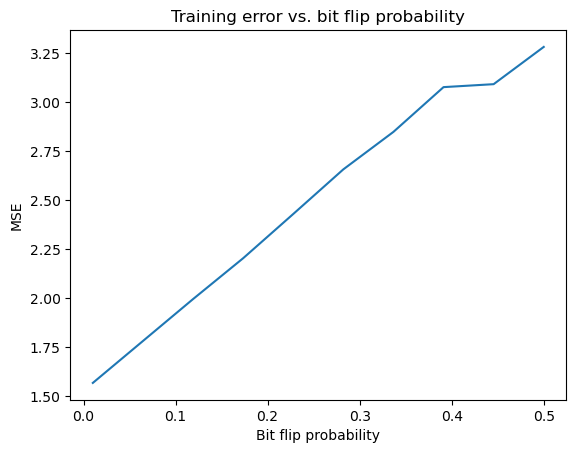

In [97]:
# plot the training error vs. bit flip probability:
plt.figure()
plt.plot(prob_flip, mses)
plt.xlabel('Bit flip probability')
plt.ylabel('MSE')
plt.title('Training error vs. bit flip probability')
plt.show()

**2.b) [2 Mark]** Train Hopfield network using the pseudo-inverse and repeat the tasks 2.a) 2-4, however, for this example, ensure the threshold value is 0. Even though the pseudo-inverse has a greater capacity than the hopfield network, we will still test up to the theoretical capcity of the Hopfield learning rule.

In [98]:
def pseudo_inv(X, lamb=0.01):
    '''
    pseudo_inv - Implements the pseudoinverse from the previous assignment.
    
    Parameters:
    -----------
    X : torch.Tensor
        A (num_patterns, num_features) Tensor holding the training data.
    lamb : float
        The regularization term for the pseudoinverse
        
    Returns:
    --------
    The pseudoinverse of X
    '''
    return torch.inverse(X.T@X + lamb * torch.eye(X.shape[1]).float()) @ X.T

def pseudoinverse_hopfield_matrix(training_patterns, lamb=0.01):
    '''
    pseudoinverse_hopfield_matrix - Uses the regularized pseudoinverse to construct a weight matrix for
        a non-modern Hopfield network.
        
    Parameters:
    -----------
    training_patterns : torch.Tensor
        The (num_patterns, num_features) Tensor containing the training data.
    lamb : float
        The regularization term for the pseudo-inverse. 
    Returns:
    --------
    The weight matrix compatible with the evaluate_hopfield_network function 
    '''
    W = pseudo_inv(training_patterns, lamb=lamb) @ training_patterns
    return W / training_patterns.shape[0]

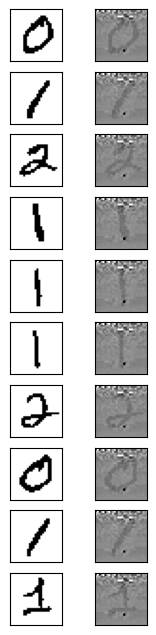

In [99]:
# repeat 2.4 with the pseudoinverse weight matrix:

# create weight matrix, W
W_pseudo = pseudoinverse_hopfield_matrix(binary_img_tensor[:10,:])

plt.figure(figsize=(2,8))

for i in range(10):
    # reconstruct training image, i.
    reconstructed_img = W_pseudo @ binary_img_tensor[i,:].reshape((1,-1)).T

    # plot original image
    plt.subplot(10,2,1+2*i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(binary_imgs[i].reshape((28,28)), vmin=-1, vmax=1, cmap='gray_r')

    # plot reconstructed image
    plt.subplot(10,2,1+2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_img.reshape((28,28)), vmin=-1, vmax=1, cmap='gray_r')

In [100]:
train_avg_pseudo, test_avg_pseudo = test_network(binary_img_tensor[:40,:], binary_img_tensor[40:80,:], C, method='pseudo_inv')

Trial 1
Train error with 2 patterns: 18.99361228942871
Test error with 2 patterns: 6.499236583709717
Train error with 3 patterns: 3.5399248600006104
Test error with 3 patterns: 2.5406882762908936
Train error with 4 patterns: 1.5302963256835938
Test error with 4 patterns: 1.5757850408554077


Train error with 5 patterns: 1.4271588325500488
Test error with 5 patterns: 1.2561595439910889
Train error with 6 patterns: 3.0607070922851562
Test error with 6 patterns: 2.235905647277832
Train error with 7 patterns: 4.004777431488037
Test error with 7 patterns: 2.5507469177246094
Train error with 8 patterns: 1.1753640174865723
Test error with 8 patterns: 1.1699212789535522
Train error with 9 patterns: 3.473083019256592
Test error with 9 patterns: 4.564286231994629
Train error with 10 patterns: 2.1821584701538086
Test error with 10 patterns: 2.176326274871826
Train error with 11 patterns: 10.056584358215332
Test error with 11 patterns: 6.681079864501953
Train error with 12 patterns: 1.4214050769805908
Test error with 12 patterns: 1.323349118232727
Train error with 13 patterns: 2.233267068862915
Test error with 13 patterns: 2.1453535556793213
Train error with 14 patterns: 1.3009603023529053
Test error with 14 patterns: 1.2703211307525635
Train error with 15 patterns: 3.762040138244629


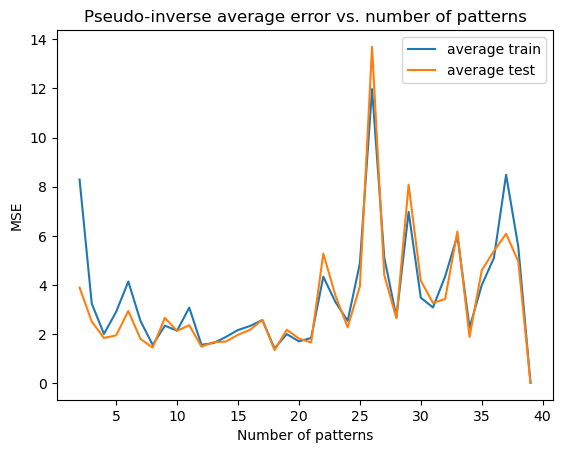

In [101]:
plt.figure()
plt.plot(range(2,C), train_avg_pseudo, label='average train')
plt.plot(range(2,C), test_avg_pseudo, label='average test')
plt.xlabel('Number of patterns')
plt.ylabel('MSE')
plt.title('Pseudo-inverse average error vs. number of patterns')
plt.legend()
plt.show()

**2.c) [1 Mark]** Show how the network behaves when an entire region of the image is corrupted. 

For your best performing network, take three test images and set half of the inputs to be equal to zero.  
Plot the original images, the corrupted images, and the reconstructed images, side-by-side.

In [102]:
test_imgs = binary_img_tensor[:10,:]
corrupted_imgs = test_imgs.clone()
reconstructed_imgs = torch.zeros((test_imgs.shape[0],test_imgs.shape[1]))

W = outer_product_hopfield_matrix(test_imgs)

# corrupt half of the image:
for i in range(corrupted_imgs.shape[0]):
    corrupted_imgs[i,392:] = 0 # set half of the image pixels to 0

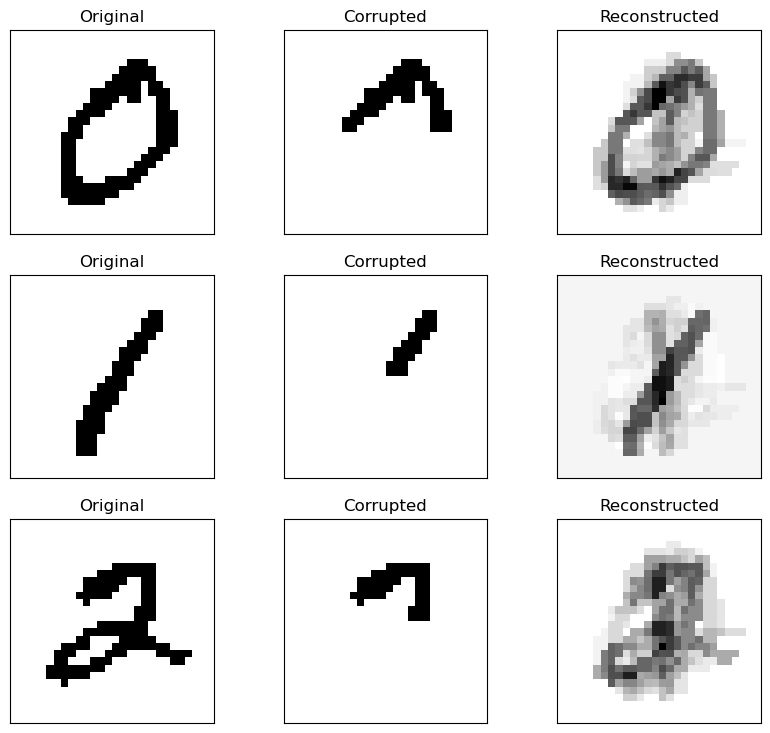

In [103]:
# plot original, corrupted, and reconstructed images
plt.subplots(3, 3, figsize=(10,9))

for i in range(3):
    plt.subplot(3,3,1+3*i)
    plt.imshow(test_imgs[i].reshape((28,28)), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title('Original')

    reconstructed_img = W @ corrupted_imgs[i,:].reshape(1, -1).T
    plt.subplot(3,3,2+3*i)
    plt.imshow(corrupted_imgs[i].reshape((28,28)), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title('Corrupted')
    
    plt.subplot(3,3,3+3*i)
    plt.imshow(reconstructed_img.reshape((28,28)), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title('Reconstructed')

# 3. Autoencoders

Now we are going to train an autoencoder to perform the same associative task that we explored above.  We are going to define our Autoencoder using sigmoid neurons, which shouldn't be too terrible, since it is a relatively shallow network, but one is not obligated to use those. 

Because we are going to use a sigmoidal output function, so we should be concerned with values in the range $[0,1]$, instead of $\{-1,1\}$.  Training will be done using the original MNIST images, **not** the binary images.


In [104]:
from torch.utils.data import TensorDataset, DataLoader

x_train_tensor = torch.from_numpy(x_train.reshape((-1,28*28)).astype(np.float32) / 255)
x_test_tensor = torch.from_numpy(x_test.reshape((-1,28*28)).astype(np.float32) / 255)

train_dataset = TensorDataset(x_train_tensor, x_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)

test_dataset = TensorDataset(x_test_tensor, x_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)

In [105]:
class Autoencoder(torch.nn.Module):
    def __init__(self, num_inputs, num_hidden):
        super().__init__()
         
        # Building an linear encoder with Linear layer followed by Sigmoid activation function
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(num_inputs, num_hidden),
            torch.nn.Sigmoid(),            
        )
         
        # Building an linear decoder with Linear layer followed by Sigmoid activation function
        # The Sigmoid activation function outputs the value between 0 and 1
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(num_hidden, num_inputs),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [106]:
import torch.nn as nn
import torch.nn.functional as F

def continue_training(training_loss, testing_loss):
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        epoch_loss = []
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.mse_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            epoch_loss.append(loss.detach().numpy())
    
    # update the list of training accuracy values
    training_loss.append(np.mean(epoch_loss)) # store the loss for later.
    print('Iteration', len(training_loss), 'Training loss:', training_loss[-1])
    
    correct = 0
    network.eval()
    test_set_loss = []
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        loss = F.mse_loss(output, target)
        test_set_loss.append(loss.detach().numpy())
        
    # update the list of testing accuracy values
    testing_loss.append(np.mean(test_set_loss))
    print('Iteration', len(testing_loss), 'Testing accuracy:', testing_loss[-1])

**3.1 [2 Marks]** For the autoencoder we will do the following:

1. Train the network and plot the testing and training losses (repeated trials) for 5 different different values of the hidden layer size.  **Ensure the number of hidden layers is always less than the number of input features**.  Select a good number of training iterations (i.e., not overfitting) and a good number of hidden neurons
2. Plot 10 input and reconstructed images from the training set and 10 from the testing set.  How do these compare to the reconstructions of from the Hopfield networks you constructed above?
3. With your trained network, compare the loss on inputs corrupted salt and pepper noise.  Sweep through a range of number of pixels corrupted from 0 to 75\%.  Because the image data is back in the range $[0,1]$, this time corrupt the image by setting pixels to equal 0 or 1 with 50\% probability.

In [107]:
# create the autoencoder here
network = Autoencoder(784, 3)

# We're all hip, fashionable people here, let's use the Adam optimizer.
optimizer = torch.optim.Adam(network.parameters(), lr = 1e-1)

In [131]:
# 3.1.a - Train the network
hidden_layer_sizes = [4, 8, 16, 32, 64, 128, 256, 510] # num units in hidden layer (< num features)
num_epochs = 20
train_mean = np.zeros((len(hidden_layer_sizes), num_epochs)) # row for each hidden layer size; col for each epoch
test_mean = np.zeros((len(hidden_layer_sizes), num_epochs))
autoencoders = [] # store a list of networks so the best one can be used later

# train the network, for 5 different values of hidden layer size
for i, sz in enumerate(hidden_layer_sizes):
    print(f"Training network with {sz} hidden units")

    # average over 5 trials
    for j in range(5):
        training_loss = []
        testing_loss = []

        # create autoencoder
        network = Autoencoder(784, sz)
        autoencoders.append(network)
        optimizer = torch.optim.Adam(network.parameters(), lr=1e-1)
        
        # train network for 10 epochs
        for iter in range(num_epochs):
            continue_training(training_loss, testing_loss)
            
        train_mean[i] += np.array(training_loss)
        test_mean[i] += np.array(testing_loss)

    train_mean[i] /= 5
    test_mean[i] /= 5

Training network with 4 hidden units
Iteration 1 Training loss: 0.06733157
Iteration 1 Testing accuracy: 0.06761108
Iteration 2 Training loss: 0.06731986
Iteration 2 Testing accuracy: 0.0675886
Iteration 3 Training loss: 0.067324616
Iteration 3 Testing accuracy: 0.06754696
Iteration 4 Training loss: 0.067325205
Iteration 4 Testing accuracy: 0.06750028
Iteration 5 Training loss: 0.06731983
Iteration 5 Testing accuracy: 0.067568555
Iteration 6 Training loss: 0.067327514
Iteration 6 Testing accuracy: 0.06750287
Iteration 7 Training loss: 0.06731298
Iteration 7 Testing accuracy: 0.06753123
Iteration 8 Training loss: 0.06375765
Iteration 8 Testing accuracy: 0.063790485
Iteration 9 Training loss: 0.06315793
Iteration 9 Testing accuracy: 0.063155025
Iteration 10 Training loss: 0.06292476
Iteration 10 Testing accuracy: 0.062845044
Iteration 11 Training loss: 0.06262599
Iteration 11 Testing accuracy: 0.06263864
Iteration 12 Training loss: 0.06225205
Iteration 12 Testing accuracy: 0.06303863
Ite

/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_54013/4013459468.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


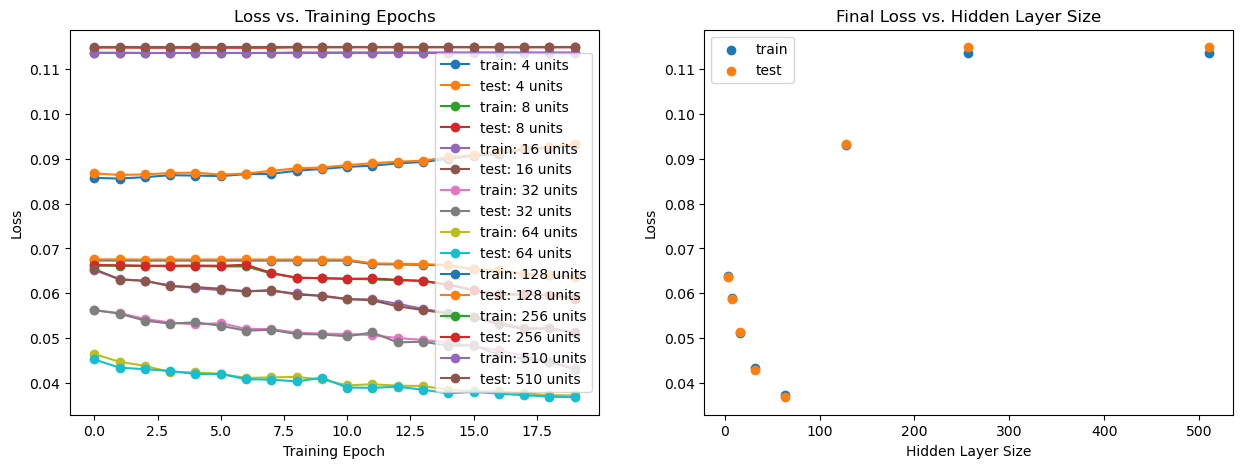

In [111]:
# plot training and testing loss (averaged over 5 trials):
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# plot 1: loss vs. training epochs
for i, sz in enumerate(hidden_layer_sizes):
    ax1.plot(train_mean[i], 'o-', label=f'train: {sz} units')
    ax1.plot(test_mean[i], 'o-', label=f'test: {sz} units')
ax1.set(title='Loss vs. Training Epochs', xlabel='Training Epoch', ylabel='Loss')
ax1.legend(prop={'size': 6})

# plot 2: final loss vs. hidden layer size
ax2.scatter(hidden_layer_sizes, np.array(train_mean[:,-1]), marker='o', label=f'train')
ax2.scatter(hidden_layer_sizes, np.array(test_mean[:,-1]), marker='o', label=f'test')
ax2.set(title='Final Loss vs. Hidden Layer Size', xlabel='Hidden Layer Size', ylabel='Loss')
ax2.legend()
plt.show()

### Result:
After 20 training epochs, the best performing hidden layer size is 64. Beyond this, the network with 128 nodes has a significantly larger starting loss which trends upards with more training, not down. It is possible that some number between 64 and 128 would be even better, or that more training would lead to a different conclusion. For the next question, I will use the 64-node network.

/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_54013/3734923207.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,2,1+2*i)
/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_54013/3734923207.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,2,1+2*i+1)


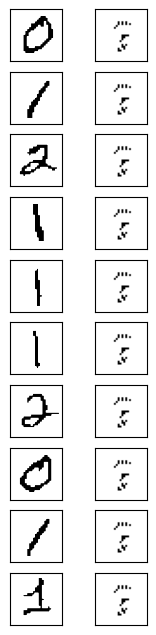

In [116]:
# 3.1.b - Plot 10 original and reconstructed images using the best hidden layer size from the previous step
plt.subplots(3, 3, figsize=(2, 8))

for i in range(10):
    # plot original image
    plt.subplot(10,2,1+2*i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(binary_img_tensor[i].reshape((28,28)), vmin=0, vmax=1, cmap='gray_r')

    # plot reconstructed image
    plt.subplot(10,2,1+2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(network(binary_img_tensor[i]).detach().numpy().reshape((28,28)), vmin=0, vmax=1, cmap='gray_r')

In [ ]:
# 3.1.c – Compare loss on inputs with salt-and-pepper noise
prob_flip = torch.linspace(0.01,0.75,10)
train_data = binary_img_tensor[:10,:]
test_data = binary_img_tensor[10:20,:]
mses = np.zeros(train_data.shape[0])

for n, p in enumerate(prob_flip):
    noisy_test = test_data.clone()
    noisy_test = salt_and_pepper(noisy_test, p)
    
    # compute test error with autoencoder for each noisy pattern:
    for i in range(noisy_test.shape[0]):
        output = network(noisy_test[i,:])
        mses[n] += F.mse_loss(output, test_data[i,:])
    
    mses[n] /= noisy_test.shape[0]

**3.2 [1 Mark]** Described what you've observed about the results of the autoencoder, compared to the Hopfield networks.

# ***TO DO***

**3.3 [1 Marks]** Sensory Preconditioning - Now we are going to look at small datasets. We are going to use the sensory preconditioning protocol, discussed by Gluck and Meyers.

We will also need to construct a data set that performs the preconditioning.  We will break this down into three phases:

1. Do the sensory preconditioning.  Plot the training loss vs number of epochs, describe the resultant behaviour.

In [117]:
# Phase 1: Train the network
# features: s1, s2, context1, context2
# we are teaching this network that these inputs only occur to gether, regardless of the context.
stimuli = np.array([[0,0,0,0],
                    [0,0,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [0,0,1,1],
                    [1,1,0,0],
                    [1,1,0,0],
                    [1,1,1,0],
                    [1,1,0,1],
                    [1,1,1,1]]).astype(np.float32)

dataset = TensorDataset(torch.from_numpy(stimuli), torch.from_numpy(stimuli))
data_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

epochs = 2000
outputs = []
losses = []

model = Autoencoder(4, 3) # must be compatible with shape (8x4)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1)
loss_function = torch.nn.BCELoss()

for epoch in range(epochs):
    for (inp, out) in data_loader:
        # print(inp.shape, out.shape)
        
        reconstructed = model(inp) # output of autoencoder
        loss = loss_function(reconstructed, out) # calculating the loss function
        
        # The gradients are set to zero, the gradient is computed and stored.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # .step() performs parameter update
        
        # Storing the losses in a list for plotting
        losses.append(loss.detach().numpy())
        pass
    outputs.append((epoch, inp, reconstructed))
    pass

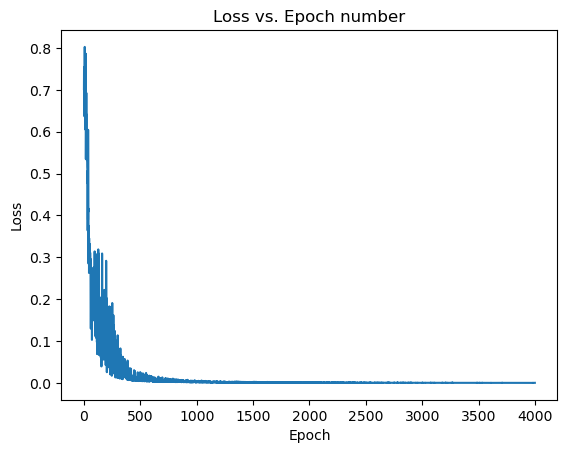

In [118]:
# Plot loss performance
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch number')
plt.show()

2. Train the conditioned response to one stimulus.  We will train this using simple linear regression where we map the the hidden state to the desired output.  You can reuse the linear regression code from above.

Lets call the features (columns) of the stimuli data as s1, s2, c1, and c2.

In [119]:
conditioning_stimuli = torch.from_numpy(np.array([[0,0,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [0,0,1,1],
                    [1,0,0,0],
                    [1,0,1,0],
                    [1,0,0,1],
                    [1,0,1,1]]).astype(np.float32))
conditioning_outputs = torch.from_numpy(np.array([[0,0,0,0,1,1,1,1]]).astype(np.float32).T)
conditioning_features = model.encoder(conditioning_stimuli)

def get_weights(features, values, lamb=0.01):
    model.decoder.weight = torch.nn.Parameter(pseudo_inv(features, lamb=lamb) @ values)
    return model.decoder.weight

def evaluate(weights, features):
    model.decoder.weight = torch.nn.Parameter(weights)
    return model.decoder(features)

W = get_weights(conditioning_features, conditioning_outputs)
conditioned_response = evaluate(W, conditioning_features[4:,:])

3. Report the strength of the conditioned response to the other stimulus.  Has the network transferred learning from one stimuls to the other?

In [120]:
test_stimuli = torch.from_numpy(np.array([
                    [0,1,0,0],
                    [0,1,1,0],
                    [0,1,0,1],
                    [0,1,1,1]]).astype(np.float32))

testing_features = model.encoder(test_stimuli)
transferred_response = evaluate(W, testing_features)

4. Compare to the response of the system without either of the preconditioned inputs

In [121]:
unconditioned_responses = evaluate(W, conditioning_features[:4,:])

5. Plot graphs showing the strength of the response to the conditioned stimuli, the pre-conditioned stimuli, and the unconditioned stimuli
(*i.e.*, s1 = 0, s2 = 0, and context in $\{(0,0),(0,1),(1,0),(1,1)\}$)

In [130]:
# plot conditioned, transferred, and unconditioned responses
response_mu = torch.mean([conditioned_response, transferred_response, unconditioned_responses], axis=1)
response_std = torch.std([conditioned_response, transferred_response, unconditioned_responses], axis=1)

fig, ax = plt.subplots()
ax.bar([1,2,3], response_mu, yerr=response_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Conditioned Responses')
ax.set_xticks([1,2,3], labels=['s1+', 's2+', 's1-,s2-'])

TypeError: mean() received an invalid combination of arguments - got (list, axis=int), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)


**[BONUS]** [1 Mark] Repeat the sensory preconditioning, but use an conditioning stimulus that is not 100\% correlated with the unconditioned stimulus. That is: change phase 2 so that it is not possible to perfectly predict the output.